In [10]:
import sys
import scanpy as sc
import pandas as pd
import numpy as np
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Vaccine Response')

# #Load Data from directories
# DTCRU.Get_Data(directory='../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
#                aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

In [6]:
path_data = '../../../data/02_dex_annotated_cd8.h5ad'
adata = sc.read(path_data)
adata

AnnData object with n_obs × n_vars = 53907 × 18471
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'LTDEMIAQY', 'YTN

In [7]:
# Drop rows where 'IR_VDJ_1_junction_aa' (beta_sequences) is NaN
adata_filtered = adata[~adata.obs['IR_VDJ_1_junction_aa'].isna()].copy()

In [13]:
# Extract beta sequences, v_beta, d_beta, j_beta, class labels, and sample labels from AnnData object
beta_sequences = np.asarray(adata_filtered.obs['IR_VDJ_1_junction_aa'])  # Amino acid junction for beta chain
v_beta = np.asarray(adata_filtered.obs['IR_VDJ_1_v_call'])  # V gene for beta chain
d_beta = np.asarray(adata_filtered.obs['IR_VDJ_1_d_call'])  # D gene for beta chain (if applicable)
j_beta = np.asarray(adata_filtered.obs['IR_VDJ_1_j_call'])  # J gene for beta chain
class_labels = np.asarray(adata_filtered.obs['leiden_CD8'])  # Assuming 'celltype' contains class labels
sample_labels = np.asarray(adata_filtered.obs['sample'])  # Assuming 'sample' contains sample IDs

# Load data into DTCRU
DTCRU.Load_Data(
    beta_sequences=beta_sequences,
    v_beta=v_beta,
    j_beta=j_beta,
    class_labels=class_labels,
    sample_labels=sample_labels
)

Data Loaded


In [14]:
from DeepTCR.DeepTCR import DeepTCR_SS

In [15]:
# Instantiate training object
DTCR_SS = DeepTCR_SS('Vaccine Supervised')

In [16]:
# Load data into DTCRU
DTCR_SS.Load_Data(
    beta_sequences=beta_sequences,
    v_beta=v_beta,
    j_beta=j_beta,
    class_labels=class_labels,
    sample_labels=sample_labels
)

Data Loaded


In [17]:
DTCR_SS.Get_Train_Valid_Test(test_size=0.25)
DTCR_SS.Train()

/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/DeepTCR/functions/Layers.py:106: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  kernel_regularizer=tf.keras.regularizers.l2(l2_reg))
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/keras/legacy_tf_layers/convolutional.py:563: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  return layer.apply(inputs)
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/DeepTCR/functions/Layers.py:107: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  conv_out = tf.compat.v1.layers.flatten(tf.reduce_max(input_tensor=conv, axis=2))
/home/tria/miniconda3/envs/deeptcr/lib/python3.7/site-packages/keras/legacy_tf_layers/core.py:523: UserWarning: `layer.apply` is deprecated a


Training_Statistics: 
 Epoch: 1 Training loss: 2.12192 Validation loss: 1.98311 Testing loss: 1.96648 Training Accuracy: 0.287 Validation Accuracy: 0.33343 Testing AUC: 0.70039
Training_Statistics: 
 Epoch: 2 Training loss: 1.75892 Validation loss: 1.77273 Testing loss: 1.74489 Training Accuracy: 0.41207 Validation Accuracy: 0.40929 Testing AUC: 0.75058
Training_Statistics: 
 Epoch: 3 Training loss: 1.61921 Validation loss: 1.67205 Testing loss: 1.64969 Training Accuracy: 0.45464 Validation Accuracy: 0.45068 Testing AUC: 0.77456
Training_Statistics: 
 Epoch: 4 Training loss: 1.53681 Validation loss: 1.60213 Testing loss: 1.57713 Training Accuracy: 0.4867 Validation Accuracy: 0.46567 Testing AUC: 0.78861
Training_Statistics: 
 Epoch: 5 Training loss: 1.47714 Validation loss: 1.55392 Testing loss: 1.53670 Training Accuracy: 0.50795 Validation Accuracy: 0.4887 Testing AUC: 0.79355
Training_Statistics: 
 Epoch: 6 Training loss: 1.43670 Validation loss: 1.52066 Testing loss: 1.49992 Traini

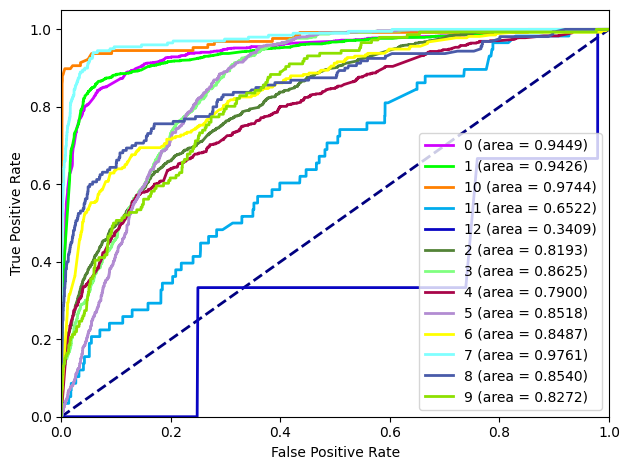

In [18]:
DTCR_SS.AUC_Curve()

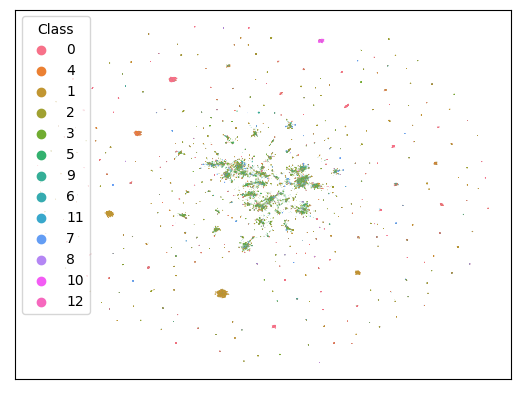

In [19]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=1000)